In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from test_model import test_model
from sklearn.metrics import confusion_matrix
from sc_sharp import scSHARP
import utilities
from sklearn import preprocessing

In [2]:
grid_results = pd.read_csv("grid_search_jung_output/combined.csv", header=None, index_col=0)
grid_results.columns = ["Total Accuracy", "Val Accuracy", "Test Accuracy", "Total SD", "Val SD", "Test SD", "Config", "Dropout", "Batch", "Neighbors"]
grid_results['GCN Layers'] = grid_results['Config'].apply(lambda x: x.split('_')[0])
grid_results['Final Embedding'] = grid_results['Config'].apply(lambda x: x.split('_')[1].split(".")[0])
grid_results['GCN Layers'] = pd.to_numeric(grid_results['GCN Layers'])
grid_results['Final Embedding'] = pd.to_numeric(grid_results['Final Embedding'])
grid_results.sort_values("Val Accuracy", ascending=False).head(10)

,Total Accuracy,Val Accuracy,Test Accuracy,Total SD,Val SD,Test SD,Config,Dropout,Batch,Neighbors,GCN Layers,Final Embedding
0,,,,,,,,,,,,
1,0.923555,0.946512,0.0,0.001590,0.008531,0.0,2_25.txt,0.0,20,2,2,25
145,0.923410,0.945736,0.0,0.002360,0.012659,0.0,2_60.txt,0.0,20,2,2,60
136,0.923410,0.945736,0.0,0.001180,0.006329,0.0,2_15.txt,0.0,65,2,2,15
10,0.923410,0.945736,0.0,0.001362,0.007309,0.0,2_25.txt,0.0,65,2,2,25
91,0.923266,0.944961,0.0,0.001980,0.010623,0.0,2_40.txt,0.0,20,2,2,40
154,0.923266,0.944961,0.0,0.002094,0.011234,0.0,2_60.txt,0.0,65,2,2,60
127,0.923266,0.944961,0.0,0.001980,0.010623,0.0,2_15.txt,0.0,20,2,2,15
142,0.923121,0.944186,0.0,0.002437,0.013074,0.0,2_15.txt,0.0,95,2,2,15
178,0.923121,0.944186,0.0,0.002239,0.012009,0.0,3_25.txt,0.0,95,2,3,25


<AxesSubplot:xlabel='Batch', ylabel='Val Accuracy'>

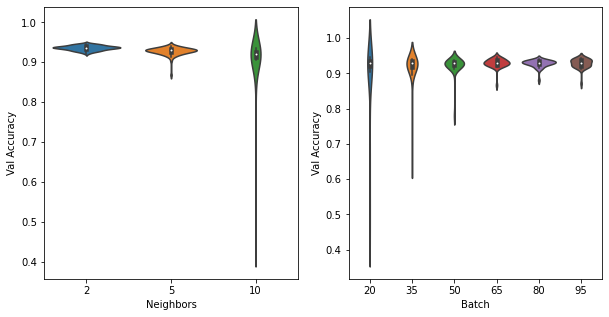

In [3]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
sns.violinplot(x=grid_results["Neighbors"], y=grid_results["Val Accuracy"], ax = axs[0])
sns.violinplot(x=grid_results["Batch"], y=grid_results["Val Accuracy"], ax = axs[1])

<AxesSubplot:xlabel='Final Embedding', ylabel='Val Accuracy'>

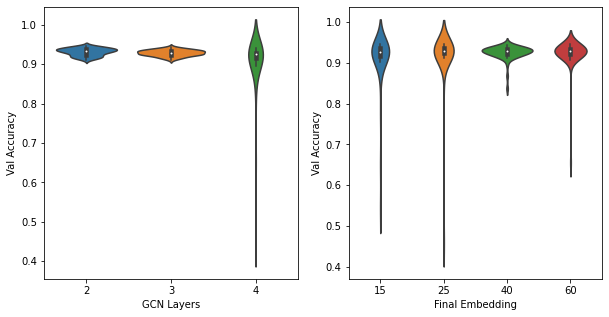

In [4]:
fig, axs = plt.subplots(1,2,figsize=(10, 5))
sns.violinplot(x=grid_results["GCN Layers"], y=grid_results["Val Accuracy"], ax = axs[0])
sns.violinplot(x=grid_results["Final Embedding"], y=grid_results["Val Accuracy"], ax = axs[1])

In [3]:
data_folders = ["/home/groups/ConradLab/daniel/sharp_data/jung/"]
tools = ["sctype","scsorter","scina"]
votes_necessary = .51
model_file = "configs/2_25.txt"
neighbors = 2
batch_size=20
training_epochs=150
random_inits = 5
counts="counts.csv"
meta="labels.csv"
meta_col = 0

In [4]:
results = test_model(data_folders, tools, votes_necessary, model_file, neighbors, batch_size, training_epochs, random_inits, counts=counts, meta=meta, meta_col=meta_col)
results

Loss in epoch 0 = 15.415061
Loss in epoch 10 = 0.015918
Loss in epoch 20 = 0.004158
Loss in epoch 30 = 0.002255
Loss in epoch 40 = 0.001281
Loss in epoch 50 = 0.000919
Loss in epoch 60 = 0.000542
Loss in epoch 70 = 0.000358
Loss in epoch 80 = 0.000296
Loss in epoch 90 = 0.000186
Loss in epoch 100 = 0.000191
Loss in epoch 110 = 0.000148
Loss in epoch 120 = 0.000084
Loss in epoch 130 = 0.000070
Loss in epoch 140 = 0.000051
Loss in epoch 0 = 18.210077
Loss in epoch 10 = 0.019594
Loss in epoch 20 = 0.005350
Loss in epoch 30 = 0.002504
Loss in epoch 40 = 0.001325
Loss in epoch 50 = 0.000944
Loss in epoch 60 = 0.000609
Loss in epoch 70 = 0.000415
Loss in epoch 80 = 0.000303
Loss in epoch 90 = 0.000200
Loss in epoch 100 = 0.000162
Loss in epoch 110 = 0.000148
Loss in epoch 120 = 0.000094
Loss in epoch 130 = 0.000089
Loss in epoch 140 = 0.000065
Loss in epoch 0 = 17.975710
Loss in epoch 10 = 0.018889
Loss in epoch 20 = 0.006874
Loss in epoch 30 = 0.002701
Loss in epoch 40 = 0.001479
Loss in ep

/home/users/lewinsda/scSHARP/utilities.py:185: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return float((torch.tensor(preds) == torch.tensor(real)).type(torch.FloatTensor).mean().numpy())


,data_name,method,total_accuracy,train_accuracy,test_accuracy,total_sd,train_sd,test_sd
0,jung,GCN,0.863295,0.865325,0.834783,0.002192,0.000000,0.032969
1,jung,Max Col.,0.852601,0.865325,0.673913,0.000000,0.000000,0.000000
2,jung,Confident Labels,NaN,0.865325,NaN,0.000000,0.000000,0.000000
3,jung,sctype,0.848266,0.863777,0.630435,0.000000,0.000000,0.000000
4,jung,scsorter,0.774566,0.828173,0.021739,0.000000,0.000000,0.000000
5,jung,scina,0.539017,0.577399,0.000000,0.000000,0.000000,0.000000
6,jung,Tool Avg.,0.720617,0.756450,0.217391,0.161529,0.156081,0.357871


(0.0, 1.0)

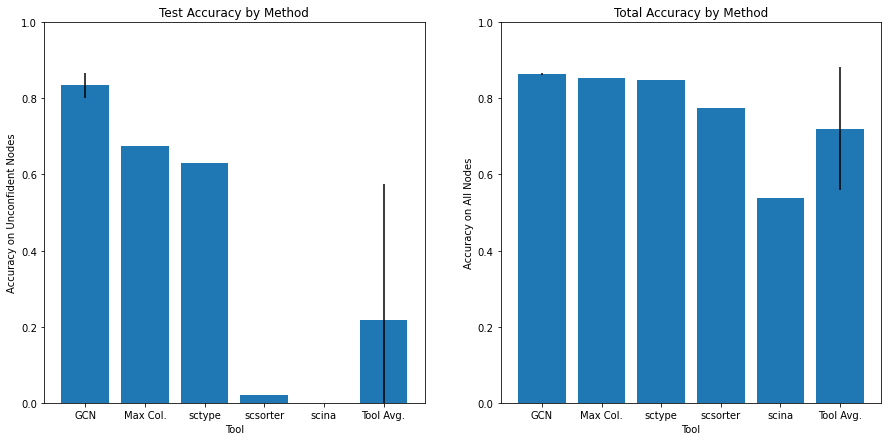

In [5]:
to_plot = results.loc[results['method']!="Confident Labels",:]
fig, ax = plt.subplots(1,2,figsize=(15, 7))
ax[0].bar(to_plot['method'],  to_plot['test_accuracy'], yerr= to_plot['test_sd'], align='center')
ax[0].set_xlabel("Tool")
ax[0].set_ylabel("Accuracy on Unconfident Nodes")
ax[0].set_title("Test Accuracy by Method")
ax[1].bar(to_plot['method'],  to_plot['total_accuracy'], yerr= to_plot['total_sd'], align='center')
ax[1].set_xlabel("Tool")
ax[1].set_ylabel("Accuracy on All Nodes")
ax[1].set_title("Total Accuracy by Method")
ax[0].set_ylim([0, 1])
ax[1].set_ylim([0, 1])

In [10]:
real_labels = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/jung/labels.csv", index_col=0).iloc[:,0]
real_labels,keys = pd.factorize(real_labels, sort=True)
keys

Index(['spc', 'spd', 'spg'], dtype='object')

In [9]:
np.count_nonzero(real_labels == 0)

244

In [7]:
data_path = "/home/groups/ConradLab/daniel/sharp_data/jung/counts.csv"
tool_preds = "/home/groups/ConradLab/daniel/sharp_data/jung/preds.csv"
tool_list = ["scina", "scsorter", "sctype"]
marker_path = "/home/groups/ConradLab/daniel/sharp_data/jung/markers.txt"
neighbors=2
config="configs/2_25.txt"
sharp = scSHARP(data_path, tool_preds, tool_list, marker_path, neighbors, config)

In [8]:
preds, train_nodes, test_nodes, keep_cells = sharp.run_prediction(training_epochs=150, thresh=0.51, batch_size=20, seed=8)

Loss in epoch 0 = 16.433146
Loss in epoch 10 = 0.023771
Loss in epoch 20 = 0.005226
Loss in epoch 30 = 0.002527
Loss in epoch 40 = 0.001270
Loss in epoch 50 = 0.001025
Loss in epoch 60 = 0.000594
Loss in epoch 70 = 0.000437
Loss in epoch 80 = 0.000288
Loss in epoch 90 = 0.000235
Loss in epoch 100 = 0.000189
Loss in epoch 110 = 0.000133
Loss in epoch 120 = 0.000102
Loss in epoch 130 = 0.000099
Loss in epoch 140 = 0.000068


In [11]:
utilities.validation_metrics(torch.tensor(real_labels), preds.cpu(), train_nodes, test_nodes)

(0.865606963634491,
 array([[162,  79,   3],
        [ 10, 146,   0],
        [  1,   0, 291]]),
 0.8653250932693481,
 array([[136,  74,   2],
        [ 10, 142,   0],
        [  1,   0, 281]]),
 0.8695651888847351,
 array([[26,  5,  1],
        [ 0,  4,  0],
        [ 0,  0, 10]]))

In [34]:
pd.Series(preds.cpu().numpy()).to_csv("/home/groups/ConradLab/daniel/sharp_data/jung/sharp_preds.csv")

In [42]:
utilities.preprocess(np.array(sharp.counts), run_pca=False, scale=False)[0].shape

(692, 6353)

In [12]:
len(train_nodes)

646

In [13]:
len(test_nodes)

46

In [22]:
int_df = sharp.run_interpretation()

int_df.columns = keys
reorg_keys = ["spg","spc","spd"]
int_df = int_df[reorg_keys]
int_df = int_df.abs()
#scale_int_df = pd.DataFrame(preprocessing.scale(int_df))
#scale_int_df.columns = int_df.columns
#scale_int_df.index = int_df.index
int_df.sort_values("spg", ascending=True).head(4)

/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/home/users/lewinsda/.conda/envs/daniel_thesis_2/lib/python3.9/site-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


,spg,spc,spd
Epsti1,0.000000e+00,0.000529,0.000370
Arsa,0.000000e+00,0.001621,0.000364
Dpp10,7.380076e-09,0.000547,0.000074
Pacrg,2.990805e-08,0.006169,0.013993


In [15]:
int_df.sort_values("spc", ascending=False).head(4)

,spg,spc,spd
Ldhc,0.001254,0.359617,0.038904
Ubb,0.015172,0.325208,0.083532
Fabp9,0.001195,0.307363,0.020371
Pabpc1,0.022872,0.282038,0.075385


In [27]:
int_df.sort_values("spd", ascending=True).head(4)

,spg,spc,spd
mt-Rnr2,0.195222,0.067471,-0.115733
Ubb,-0.015172,0.325207,-0.083532
Pabpc1,0.022872,0.282038,-0.075385
Calm3,-0.002296,0.165008,-0.053767


[Text(0.5, 15.0, 'Cell Type')]

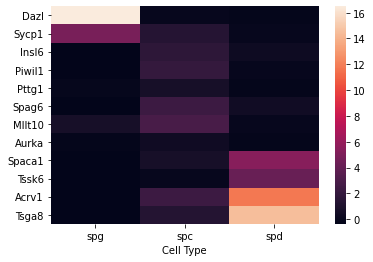

In [27]:
markers = ['Dazl','Sycp1','Insl6','Piwil1','Pttg1','Spag6','Mllt10','Aurka','Spaca1','Tssk6','Acrv1','Tsga8']
ax = sns.heatmap(scale_int_df.loc[markers,:])
ax.set(xlabel="Cell Type")
#ax.legend()

In [29]:
int_df.sort_values("spg", ascending=False).head(10)

,spg,spc,spd
mt-Rnr2,0.195222,0.067471,0.115733
Ncl,0.125735,0.003162,0.000732
Hsp90ab1,0.112324,0.012471,0.007344
Dazl,0.097737,0.002462,0.000819
Rpl4,0.065305,0.007706,0.008306
Prrc2c,0.064586,0.002241,0.002643
Anp32b,0.063572,0.003314,0.000575
Tpr,0.060133,0.006498,0.002226
Serbp1,0.054149,0.009940,0.002583
Pdap1,0.053790,0.000545,0.000834


In [43]:
int_df.sort_values("spc", ascending=False).head(10)

,spg,spc,spd
Ldhc,0.001254,0.359617,0.038904
Ubb,0.015172,0.325208,0.083532
Fabp9,0.001195,0.307363,0.020371
Pabpc1,0.022872,0.282038,0.075385
Meig1,0.001429,0.248299,0.018715
Calm2,0.024387,0.242530,0.010826
Calm1,0.003014,0.218585,0.036050
Tuba3b,0.009845,0.203809,0.038230
Lyar,0.005533,0.201819,0.049424
Morf4l1,0.004483,0.194731,0.038400


In [44]:
int_df.sort_values("spd", ascending=False).head(10)

,spg,spc,spd
Tnp1,0.001038,0.112190,0.344952
Smcp,0.000645,0.083822,0.249083
Tsga8,0.000052,0.020645,0.129156
Dbil5,0.000642,0.042772,0.128397
Gm9999,0.000080,0.021477,0.119774
mt-Rnr2,0.195222,0.067471,0.115733
Acrv1,0.000350,0.035392,0.105225
Ccdc136,0.005704,0.086988,0.095432
Fam229a,0.000545,0.018937,0.094873
D830044I16Rik,0.000266,0.017218,0.088024


[Text(0.5, 15.0, 'Cell Type')]

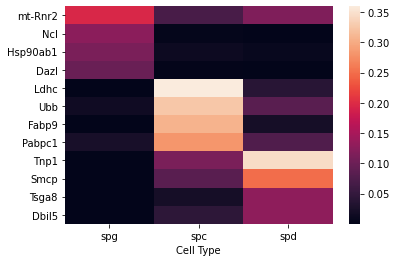

In [28]:
#int_df = sharp.run_interpretation()

#int_df.columns = keys
#reorg_keys = ["spg","spc","spd"]
#int_df = int_df[reorg_keys]
#int_df = int_df.abs()
keep_genes = int_df.sort_values("spg", ascending=False).head(4).index.tolist()
keep_genes += int_df.sort_values("spc", ascending=False).head(4).index.tolist()
keep_genes += int_df.sort_values("spd", ascending=False).head(4).index.tolist()
ax = sns.heatmap(int_df.loc[keep_genes,:])
ax.set(xlabel="Cell Type")

In [16]:
int_df.loc["Aurka"]

spg    0.001166
spc    0.008381
spd    0.000387
Name: Aurka, dtype: float64

In [17]:
#spc,Insl6,Piwil1,Pttg1,Spag6,Mllt10,Aurka
keep_genes = int_df.sort_values("spc", ascending=False).head(10).index.tolist()
#keep_genes = int_df.sort_values("spd", ascending=False).head(10).index.tolist()
#keep_genes = int_df.sort_values("spg", ascending=False).head(10).index.tolist()
int_df.loc[keep_genes,:]

,spg,spc,spd
Ldhc,0.001254,0.359617,0.038904
Ubb,0.015172,0.325207,0.083532
Fabp9,0.001195,0.307363,0.020371
Pabpc1,0.022872,0.282038,0.075385
Meig1,0.001429,0.248299,0.018715
Calm2,0.024387,0.242530,0.010826
Calm1,0.003014,0.218585,0.036050
Tuba3b,0.009845,0.203808,0.038230
Lyar,0.005533,0.201818,0.049424
Morf4l1,0.004483,0.194731,0.038400


In [23]:
umap_embedding = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/jung/umap_embedding.csv", index_col=0)
umap_embedding['real labels'] = pd.read_csv("/home/groups/ConradLab/daniel/sharp_data/jung/labels.csv", index_col=0).iloc[:,0]

umap_embedding['confident labels'] = sharp.confident_labels
map_dict = {-1:"unknown", 0:"spc", 1:"spd", 2:"spg"}
umap_embedding['confident labels'] = umap_embedding["confident labels"].map(map_dict)

<AxesSubplot:xlabel='UMAP_1', ylabel='UMAP_2'>

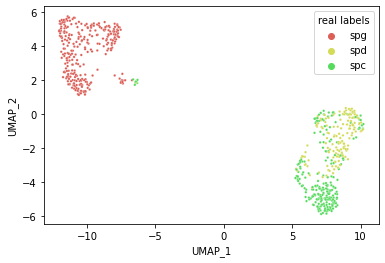

In [24]:
sns.scatterplot(data=umap_embedding, x="UMAP_1", y="UMAP_2", hue="real labels", s=6,  palette=dict(spg='#db5f57', spd="#d3db57", spc = "#57db5f"))

<AxesSubplot:xlabel='UMAP_1', ylabel='UMAP_2'>

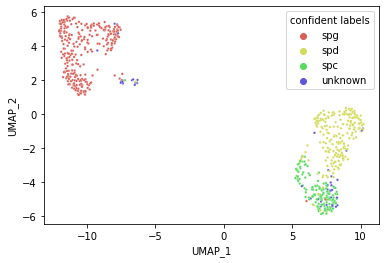

In [26]:
sns.scatterplot(data=umap_embedding, x="UMAP_1", y="UMAP_2", hue="confident labels", s=6,  palette=dict(spg='#db5f57', spd="#d3db57", spc = "#57db5f", unknown='#5f57db'))